# Telecomunicaciones: identificar operadores ineficaces  

# Telecommunications: Identifying Ineffective Operators

El servicio de telefonía virtual CallMeMaybe está desarrollando una nueva función que brindará a los supervisores y las supervisores información sobre los operadores menos eficaces. Se considera que un operador es ineficaz si tiene una gran cantidad de llamadas entrantes perdidas (internas y externas) y un tiempo de espera prolongado para las llamadas entrantes. Además, si se supone que un operador debe realizar llamadas salientes, un número reducido de ellas también será un signo de ineficacia.

The virtual telephony service CallMeMaybe is developing a new feature that will provide supervisors with information about the least effective operators. An operator is considered ineffective if they have a high number of missed incoming calls (both internal and external) and long waiting times for incoming calls. Additionally, if an operator is supposed to make outgoing calls, a low number of those will also indicate inefficiency.

Pasos del proyecto / Project Steps:
1. Obejtivo
2. Análisis exploratorio de datos
3. Identificar operadores ineficaces
4. Pruena de hipótrsis
5. Conclusiones y recomendaciones
6. Fuentes de información

---

1. Objective
2. Exploratory Data Analysis
3. Identifying Ineffective Operators
4. Hypothesis Testing
5. Conclusions and Recommendations
6. Information Sources

**Descripción de los datos / Data Description**
Los datasets contienen información sobre el uso del servicio de telefonía virtual CallMeMaybe. Sus clientes son organizaciones que necesitan distribuir gran cantidad de llamadas entrantes entre varios operadores, o realizar llamadas salientes a través de sus operadores. Los operadores también pueden realizar llamadas internas para comunicarse entre ellos. Estas llamadas se realizan a través de la red de CallMeMaybe.

El dataset comprimido `telecom_dataset_us.csv` contiene las siguientes columnas:
- `user_id`: ID de la cuenta de cliente
- `date`: fecha en la que se recuperaron las estadísticas
- `direction`: "dirección" de llamada (`out` para saliente, `in` para entrante)
- `internal`: si la llamada fue interna (entre los operadores de un cliente o clienta)
- `operator_id`: identificador del operador
- `is_missed_call`: si fue una llamada perdida
- `calls_count`: número de llamadas
- `call_duration`: duración de la llamada (sin incluir el tiempo de espera)
- `total_call_duration`: duración de la llamada (incluido el tiempo de espera)

El conjunto de datos `telecom_clients_us.csv` tiene las siguientes columnas:
- `user_id`: ID de usuario/a
- `tariff_plan`: tarifa actual de la clientela
- `date_start`: fecha de registro de la clientela

---

The datasets contain information about the usage of the virtual telephony service CallMeMaybe. Its clients are organizations that need to distribute a large number of incoming calls among several operators or make outgoing calls through their operators. Operators can also make internal calls to communicate with one another. These calls are made through the CallMeMaybe network.

The compressed dataset `telecom_dataset_us.csv` contains the following columns:
- `user_id`: Client account ID
- `date`: Date when the statistics were retrieved
- `direction`: "Direction" of the call (`out` for outgoing, `in` for incoming)
- `internal`: Indicates if the call was internal (between operators of the same client)
- `operator_id`: Operator identifier
- `is_missed_call`: Indicates if it was a missed call
- `calls_count`: Number of calls
- `call_duration`: Duration of the call (excluding wait time)
- `total_call_duration`: Duration of the call (including wait time)

The dataset `telecom_clients_us.csv` contains the following columns:
- `user_id`: User ID
- `tariff_plan`: Client’s current tariff plan
- `date_start`: Date the client registered

## Obejtivo / Objective
Identificar operadores ineficaces, para saber con quienes debe o no seguir trabajando el departamento de operaciones de CallMeMaybe.

La eficiencia en este contexto es crucial porque afecta directamente el rendimiento general del servicio de telefonía virtual. Un sistema eficiente mejora la experiencia del cliente y optimiza los recursos operativos. Esto es especialmente relevante en CallMeMaybe, ya que los supervisores buscan identificar operadores ineficaces para corregir problemas.

---

Identify ineffective operators to determine with whom the CallMeMaybe operations department should or should not continue working.

Efficiency in this context is crucial because it directly impacts the overall performance of the virtual telephony service. An efficient system improves the customer experience and optimizes operational resources. This is especially relevant for CallMeMaybe, as supervisors seek to identify ineffective operators to address and correct issues.

## Análisis exploratorio de datos / Exploratory Data Analysis

In [1]:
# Importar librerias
# Import Libraries
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr

### Archivos / Files

In [2]:
# Abrir archivos
# Open files
data = pd.read_csv('/datasets/telecom_dataset_us.csv')
clients = pd.read_csv('/datasets/telecom_clients_us.csv')

In [3]:
# Muestra data
# Show data
data.head()

,user_id,date,direction,internal,operator_id,is_missed_call,calls_count,call_duration,total_call_duration
0,166377,2019-08-04 00:00:00+03:00,in,False,NaN,True,2,0,4
1,166377,2019-08-05 00:00:00+03:00,out,True,880022.0,True,3,0,5
2,166377,2019-08-05 00:00:00+03:00,out,True,880020.0,True,1,0,1
3,166377,2019-08-05 00:00:00+03:00,out,True,880020.0,False,1,10,18
4,166377,2019-08-05 00:00:00+03:00,out,False,880022.0,True,3,0,25


### Información general / General information

In [4]:
# Información general data
# General data information
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53902 entries, 0 to 53901
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   user_id              53902 non-null  int64  
 1   date                 53902 non-null  object 
 2   direction            53902 non-null  object 
 3   internal             53785 non-null  object 
 4   operator_id          45730 non-null  float64
 5   is_missed_call       53902 non-null  bool   
 6   calls_count          53902 non-null  int64  
 7   call_duration        53902 non-null  int64  
 8   total_call_duration  53902 non-null  int64  
dtypes: bool(1), float64(1), int64(4), object(3)
memory usage: 3.3+ MB


Se observan valores ausentes en `internal` y `operator_id` y `date` no tiene el tipo correcto.

There are missing values in `internal` and `operator_id`, and `date` does not have the correct type.

In [5]:
# Cambiar `date` a datetime
# Change `date` to datetime
data['date'] = pd.to_datetime(data['date'], format = '%Y-%m-%d %H:%M:%S%z')

In [6]:
# Muestra clients
# Show clients
clients.head()

,user_id,tariff_plan,date_start
0,166713,A,2019-08-15
1,166901,A,2019-08-23
2,168527,A,2019-10-29
3,167097,A,2019-09-01
4,168193,A,2019-10-16


In [7]:
# Información general clients
# General information clients
clients.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 732 entries, 0 to 731
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   user_id      732 non-null    int64 
 1   tariff_plan  732 non-null    object
 2   date_start   732 non-null    object
dtypes: int64(1), object(2)
memory usage: 17.3+ KB


No se observan valores ausentes y `date_start` no tiene el tipo correcto.

No missing values are observed, and `date_start` does not have the correct type.

In [8]:
# Cambiar 'date_start' a datetime
# Change `date_start` to datetime
clients['date_start'] = pd.to_datetime(clients['date_start'], format = '%Y-%m-%d')

### Valores ausentes / Missing values

In [9]:
# Verificar si hay valores ausentes en `data`
# Check if there are missing values in `data`
data.isna().sum()

user_id                   0
date                      0
direction                 0
internal                117
operator_id            8172
is_missed_call            0
calls_count               0
call_duration             0
total_call_duration       0
dtype: int64

Hay más de 8000 datos ausentes de `operator_id`, no hay forma de recuperar los datos ni saber por qué faltan. 
Como la finalidad del proyecto es saber la eficacia de los operadores, sin su id estos datos no son utiles, así que no se van a tener en cuenta para el análisis. Además los valores ausentes restantes de `internal` se van a reemplazar por `unknown`.

There are more than 8000 missing data points for `operator_id`, and there's no way to recover or determine why they are missing. Since the project's goal is to assess the effectiveness of the operators, without their ID, this data is not useful and will be excluded from the analysis. Additionally, the remaining missing values in `internal` will be replaced with `unknown`.

In [10]:
# Eliminar datos de valores ausentes
# Remove missing data values
data.dropna(subset=['operator_id'], inplace = True)

# Reemplezar por `unknown` los valors ausentes de `internal`
# Replace missing values in `internal` with `unknown`
data['internal'] = data['internal'].fillna('unknown')

data.isna().sum()

user_id                0
date                   0
direction              0
internal               0
operator_id            0
is_missed_call         0
calls_count            0
call_duration          0
total_call_duration    0
dtype: int64

In [11]:
# Verificar si hay valores ausentes en `clients`
# Check if there are missing values in `clients`
clients.isna().sum()

user_id        0
tariff_plan    0
date_start     0
dtype: int64

### Valores duplicados / Duplicate values

In [12]:
# Verificar si hay duplicados en `data`
# Check if there are duplicates in `data`
data.duplicated().sum()

4184

Hay `4184` valores duplicados, así que se deben eliminar.

There are `4184` duplicate values, so they should be removed.

In [13]:
# Eliminar duplicados
# Remove duplicates
data.drop_duplicates(inplace = True)

In [14]:
# Verificar si hay duplicados en `clients`
# Check for duplicates in `clients`
clients.duplicated().sum()

0

## Identificar operadores ineficaces / Identify ineffective operators

### Llamadas perdidas / Missed calls

In [15]:
# Filtrar por llamadas entrantes 
# Filter by incoming calls
data_in = data[data['direction'] == 'in'].copy()

# Llamadas pedidas por operador (internas y externas)
# Missed calls by operator (internal and external)
missed_calls_by_operator = data_in.groupby('operator_id').agg(total_calls = ('calls_count', 'sum'), missed_calls = ('is_missed_call', 'sum')).reset_index()
missed_calls_by_operator['missed_calls_percentage'] = ((missed_calls_by_operator['missed_calls']/missed_calls_by_operator['total_calls'])*100).round(0).astype(int)

# Ordenar los operadores por porcentaje de llamadas perdidas
# Sort the operators by percentage of missed calls
missed_calls_by_operator = missed_calls_by_operator.sort_values('missed_calls_percentage', ascending=False)

missed_calls_by_operator

,operator_id,total_calls,missed_calls,missed_calls_percentage
641,948756.0,1,1,100
287,913886.0,2,1,50
109,897872.0,3,1,33
467,934098.0,6,2,33
698,957922.0,3,1,33
...,...,...,...,...
293,914170.0,12,0,0
294,914172.0,6,0,0
295,914256.0,24,0,0
296,914426.0,3,0,0


In [16]:
# Promedio llamadas perdidas por operador
# Average missed calls per operator
avg_missed_calls = missed_calls_by_operator['missed_calls_percentage'].mean().round(0).astype(int)
avg_missed_calls

1

El promedio de llamadas perdidas es `1%`, así que un número de llamadas perdidas mayor a este podría ser un indicador de ineficiencia. 

The average of missed calls is `1%`, so a higher number of missed calls could be an indicator of inefficiency.

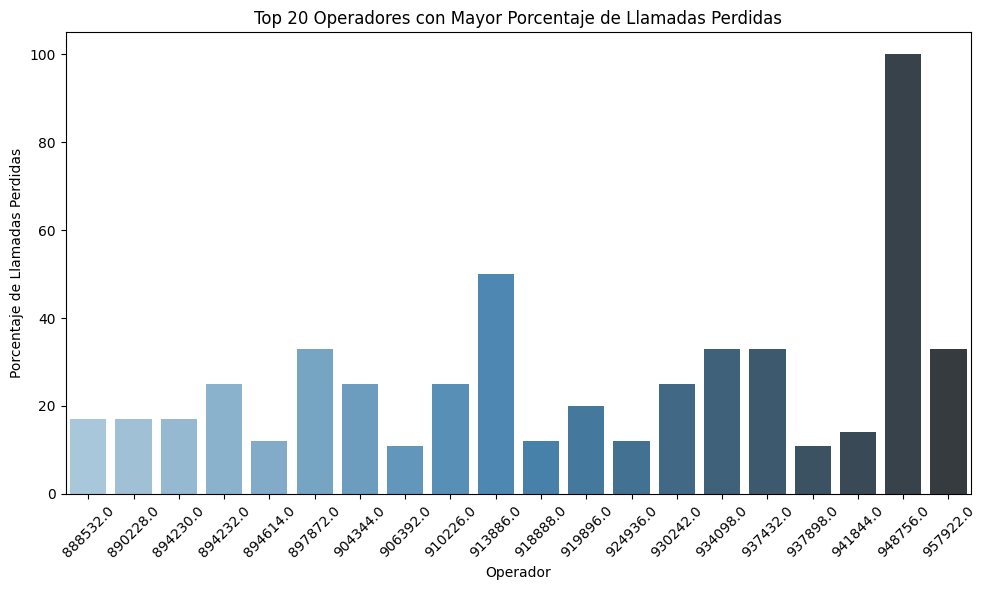

In [17]:
# Mostrar los 20 operadores con mayor porcentaje de llamadas perdidas
# Show the top 20 operators with the highest percentage of missed calls
top_20_operators = missed_calls_by_operator.head(20)

# Crear el gráfico de barras
# Create the bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x='operator_id', y='missed_calls_percentage', data=top_20_operators, palette="Blues_d")

# Agregar etiquetas
# Add labels
plt.title('Top 20 Operadores con Mayor Porcentaje de Llamadas Perdidas')
plt.xlabel('Operador')
plt.ylabel('Porcentaje de Llamadas Perdidas')

# Rotar las etiquetas del eje X para mayor legibilidad
# Rotate the X-axis labels for better readability
plt.xticks(rotation=45)

# Mostrar el gráfico
# Show the chart
plt.tight_layout()
plt.show()

Hay un operador que sobresale con el `100%` de las llamadas perdidas.

There is one operator that stands out with `100%` of missed calls.

### Tiempo de espera prolongados / Long wait times

In [18]:
# Tiempo de espera para llamadas entrantes
# Wait time for incoming calls
data_in['waiting_time'] = data_in['total_call_duration'] - data_in['call_duration']

In [19]:
# Tiempo de espera para llamadas entrantes por operador
# Wait time for incoming calls by operator
waiting_time = data_in.groupby('operator_id')['waiting_time'].mean().reset_index()
waiting_time = waiting_time.rename(columns = {'waiting_time': 'avg_waiting_time'})

# Ordenar por el tiempo promedio de espera
# Sort by average wait time
waiting_time = waiting_time.sort_values('avg_waiting_time', ascending=False)

waiting_time

,operator_id,avg_waiting_time
337,919794.0,1007.375000
206,906070.0,889.800000
335,919790.0,866.803279
445,931458.0,681.961538
358,921318.0,615.418182
...,...,...
404,926872.0,1.461538
677,952982.0,1.166667
636,948282.0,1.000000
675,952954.0,1.000000


In [20]:
# Tiempo promedio de espera para llamadas entrantes
# Average wait time for incoming calls
avg_waiting_time = waiting_time['avg_waiting_time'].mean().round(0).astype(int)
avg_waiting_time

58

El tiempo promedo de espera en las llamadas entrantes por operador es de `58`, por lo que un tiempo mayor a este podría ser un indicador de ineficiencia. 

The average wait time for incoming calls per operator is `58`, so a time greater than this could be an indicator of inefficiency.

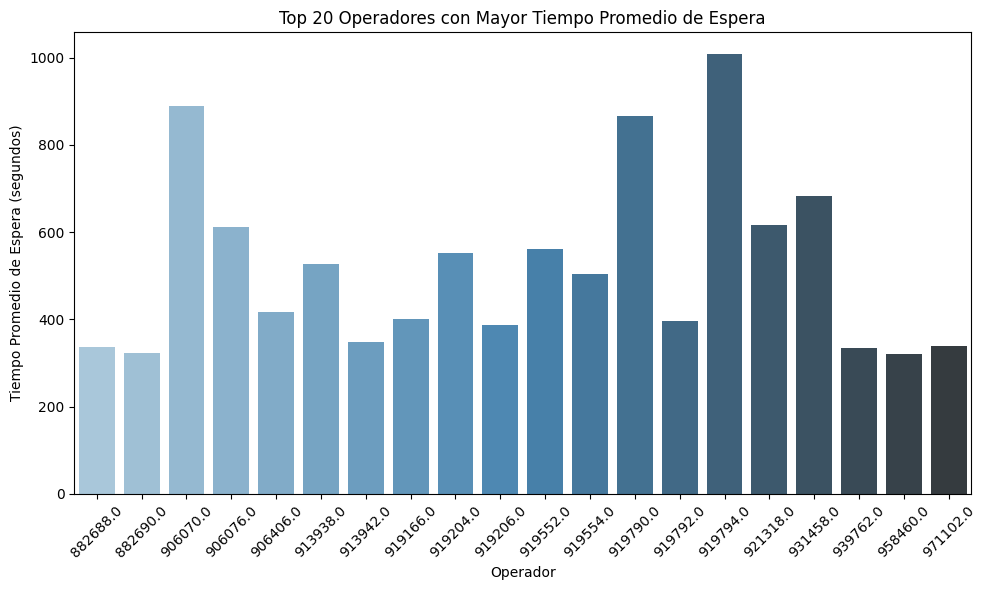

In [21]:
# Mostrar solo los 20 operadores con mayor tiempo de espera
# Show only the top 20 operators with the highest wait time
top_20_operators_waiting_time = waiting_time.head(20)

# Crear el gráfico de barras
# Create the bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x='operator_id', y='avg_waiting_time', data=top_20_operators_waiting_time, palette="Blues_d")

# Agregar etiquetas
# Add labels
plt.title('Top 20 Operadores con Mayor Tiempo Promedio de Espera')
plt.xlabel('Operador')
plt.ylabel('Tiempo Promedio de Espera (segundos)')

# Rotar las etiquetas del eje X para mayor legibilidad
# Rotate the X-axis labels for better readability
plt.xticks(rotation=45)

# Mostrar el gráfico
# Show the chart
plt.tight_layout()
plt.show()

Hay `12` operadores con más de 400 segundos en tiempo de espera para llamadas entrantes. 

There are `12` operators with more than 400 seconds of wait time for incoming calls.

### Llamadas salientes / Outgoing calls

In [22]:
# Filtrar por llamadas salientes
# Filter by outgoing calls
data_out = data[data['direction'] == 'out'].copy()

# Llamadas salientes por operador
# Outgoing calls by operator
outgoing_calls_by_operator = data_out.groupby('operator_id')['calls_count'].sum().reset_index()
outgoing_calls_by_operator = outgoing_calls_by_operator.rename(columns = {'calls_count':'total_outgoing_calls'})

# Ordenar por el número de llamadas salientes
# Sort by the number of outgoing calls
outgoing_calls_by_operator = outgoing_calls_by_operator.sort_values('total_outgoing_calls', ascending=False)

outgoing_calls_by_operator

,operator_id,total_outgoing_calls
25,885890.0,58977
24,885876.0,58437
466,929428.0,23754
446,925922.0,19603
255,908640.0,14239
...,...,...
553,937770.0,1
554,937772.0,1
556,937778.0,1
200,905480.0,1


In [23]:
# Promedio de llamadas salientes por operador
# Average number of outgoing calls per operator
avg_out_calls = outgoing_calls_by_operator['total_outgoing_calls'].mean().round(0).astype(int)
avg_out_calls

690

El promedo de llamadas salientes por operador es de `690`, por lo que un número inferior a este podría ser un indicador de ineficiencia.

The average number of outgoing calls per operator is `690`, so a number lower than this could be an indicator of inefficiency.

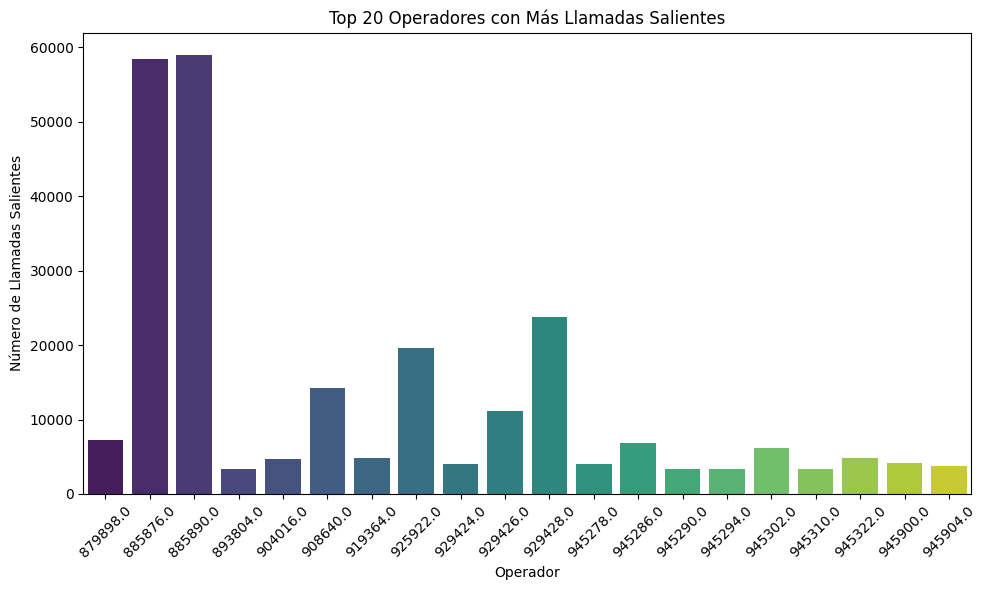

In [24]:
# Mostrar solo los 20 operadores con más llamadas salientes
# Show only the top 20 operators with the most outgoing calls
top_20_operators_outgoing_calls = outgoing_calls_by_operator.head(20)

# Crear el gráfico de barras
# Create the bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x='operator_id', y='total_outgoing_calls', data=top_20_operators_outgoing_calls, palette="viridis")

# Agregar etiquetas
# Add labels
plt.title('Top 20 Operadores con Más Llamadas Salientes')
plt.xlabel('Operador')
plt.ylabel('Número de Llamadas Salientes')

# Rotar las etiquetas del eje X para mayor legibilidad
# Rotate the X-axis labels for better readability
plt.xticks(rotation=45)

# Mostrar el gráfico
# Show the chart
plt.tight_layout()
plt.show()

Hay 2 operadores que tienen casi `6000` llamadas salientes.

There are 2 operators who have almost `6000` outgoing calls.

### Operadores ineficaces / Ineffective operators

In [25]:
# Unir los dataframes
# Join dataframes
operator_metrics = missed_calls_by_operator.merge(waiting_time, on = 'operator_id')
operator_metrics = operator_metrics.merge(outgoing_calls_by_operator, on = 'operator_id')

In [26]:
# Establecer umbrales
# Establishing thresholds
threshold_missed_calls = 1
threshold_waiting_time = 58
threshold_avg_out_calls = 690

# Identificar operadores ineficaces
# Identify inefficient operators
operator_metrics['ineffective'] = ((operator_metrics['missed_calls_percentage'] > threshold_missed_calls) & 
                       (operator_metrics['avg_waiting_time'] > threshold_waiting_time) &
                      (operator_metrics['total_outgoing_calls'] < threshold_avg_out_calls))
operator_metrics

,operator_id,total_calls,missed_calls,missed_calls_percentage,avg_waiting_time,total_outgoing_calls,ineffective
0,948756.0,1,1,100,8.000000,170,False
1,897872.0,3,1,33,21.666667,49,False
2,957922.0,3,1,33,13.000000,16,False
3,937432.0,3,1,33,12.000000,19,False
4,894232.0,4,1,25,14.333333,16,False
...,...,...,...,...,...,...,...
539,914050.0,12,0,0,10.200000,387,False
540,914168.0,1,0,0,11.000000,10,False
541,914170.0,12,0,0,28.600000,4,False
542,914256.0,24,0,0,24.533333,1,False


In [27]:
# Operadores ineficaces
# Inefficient operators
ineffective_operators = operator_metrics[operator_metrics['ineffective'] == True].reset_index()
ineffective_operators

,index,operator_id,total_calls,missed_calls,missed_calls_percentage,avg_waiting_time,total_outgoing_calls,ineffective
0,21,884408.0,35,3,9,66.000000,25,True
1,23,944226.0,180,14,8,153.580000,109,True
2,30,944216.0,235,16,7,160.923077,133,True
3,34,944222.0,185,11,6,139.266667,344,True
4,35,944220.0,265,12,5,187.411765,221,True
5,37,945046.0,60,3,5,81.923077,29,True
6,46,920706.0,68,3,4,60.222222,140,True
7,47,898414.0,24,1,4,86.000000,59,True
8,48,944218.0,245,11,4,187.416667,164,True
9,50,958434.0,23,1,4,81.090909,138,True


De acuerdo a las metricas establecidas hay `24` operadores ineficaces porque tienen más de `1%` llamadas perdidas, más de `58` minutos de espera en las llamadas entrantes y menos de `690` llamadas salientes.

According to established metrics there are `24` inefficient operators because they have more than `1%` dropped calls, more than `58` minutes on hold on incoming calls and less than `690` outgoing calls.

### Cantidad de operadores ineficaces / Number of inefficient operators

In [28]:
# Contar cuántos operadores son ineficaces
# Count how many operators are inefficient
ineffective_count = operator_metrics['ineffective'].sum()

# Contar el total de operadores
# Counting the total number of operators
total_operators = operator_metrics['operator_id'].nunique()

# Calcular el porcentaje de operadores ineficaces
# Calculate the percentage of inefficient operators
percentage_ineffective_operators = ((ineffective_count / total_operators) * 100).round(2)
percentage_ineffective_operators

4.41

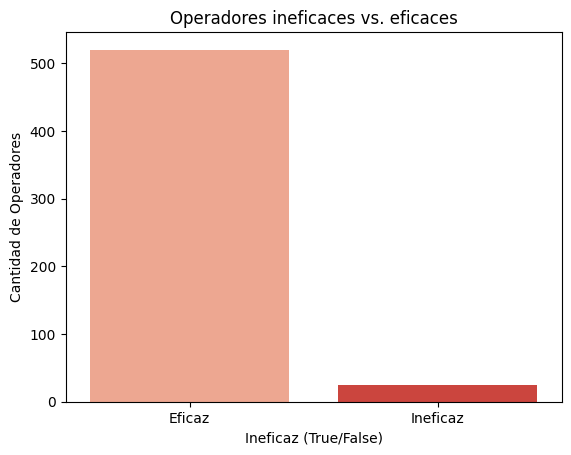

In [29]:
# Contar cuántos operadores son ineficaces y cuántos son eficaces
# Counting how many operators are ineffective and how many are effective
ineffective_count = operator_metrics['ineffective'].value_counts()

# Crear gráfico de barras
# Create bar chart
sns.barplot(x=ineffective_count.index, y=ineffective_count.values, palette="Reds")
plt.title('Operadores ineficaces vs. eficaces')
plt.xlabel('Ineficaz (True/False)')
plt.ylabel('Cantidad de Operadores')
plt.xticks(ticks=[0, 1], labels=['Eficaz', 'Ineficaz'])
plt.show()

Como se puede observar, solo el `4.4%` de los operadores son ineficaces.

As can be seen, only `4.4%` of the operators are ineffective.

## Prueba de hipótesis / Hypothesis testing

Hipótesis: Los operadores con un mayor número de llamadas perdidas tienen tiempos de espera más largos.

Hypothesis: Operators with a higher number of dropped calls have longer waiting times.

In [31]:
# Cálculo del coeficiente de correlación de Pearson
# Calculation of Pearson's correlation coefficient
corr, p_value = pearsonr(operator_metrics['total_outgoing_calls'], operator_metrics['avg_waiting_time'])
print(f"Coeficiente de correlación: {corr}")
print(f"Valor p: {p_value}")

# Interpretación del valor p
# Interpretation of the p-value
if p_value < 0.05:
    print("Existe una relación significativa entre el número de llamadas perdidas y el tiempo de espera.")
else:
    print("No hay una relación significativa entre el número de llamadas perdidas y el tiempo de espera.")

Coeficiente de correlación: 0.04895804232208174
Valor p: 0.2543092071406952
No hay una relación significativa entre el número de llamadas perdidas y el tiempo de espera.


## Conclusiones y recomendaciones / Conclusions and recommendations

**Conclusiones / Conclusions:**

1. Llamadas perdidas (1%):
- El promedio de llamadas perdidas por operador es bajo (`1%`), lo que indica que la mayoría de los operadores están respondiendo a las llamadas entrantes. 
   
2. Tiempo de espera para llamadas entrantes (58 segundos):
- El tiempo promedio de espera de `58 segundos` es un valor relativamente alto. Este indicador puede reflejar que los operadores no están atendiendo las llamadas con la rapidez esperada, lo cual podría generar insatisfacción entre los clientes.
   
3. Promedio de llamadas salientes (15 llamadas por operador):
- El promedio de llamadas salientes por operador (`15`) es un valor razonable, pero depende del contexto del negocio. Si los operadores tienen la responsabilidad de hacer llamadas salientes como parte de su trabajo, este valor podría indicar que no están cumpliendo con las expectativas. Si el negocio se enfoca más en llamadas entrantes, entonces este número podría ser adecuado.
   
4. Porcentaje de operadores ineficaces (4.4%):
- El `4.4%`1 de los operadores son considerados ineficaces según los umbrales establecidos. Aunque este porcentaje es relativamente bajo, indica que hay un pequeño grupo de operadores que no están cumpliendo con las expectativas en términos de llamadas perdidas, tiempos de espera y llamadas salientes. Esto podría sugerir la necesidad de capacitación o un cambio en la asignación de tareas o recursos.

---

1. Missed calls (1%):
- The average number of missed calls per operator is low (`1%`), indicating that most operators are answering incoming calls. 
   
2. Waiting time for incoming calls (58 seconds):
- The average waiting time of `58 seconds` is a relatively high value. This indicator may reflect that operators are not answering calls as quickly as expected, which could lead to customer dissatisfaction.
   
3. Average number of outgoing calls (15 calls per operator):
- The average number of outbound calls per operator (`15`) is a reasonable value, but it depends on the business context. If operators are responsible for making outbound calls as part of their job, this value may indicate that they are not meeting expectations. If the business is more focused on inbound calls, then this number may be appropriate.
   
4. Percentage of ineffective operators (4.4%):
- `4.4%`1 of operators are considered ineffective according to established thresholds. Although this percentage is relatively low, it indicates that there is a small group of operators who are not meeting expectations in terms of dropped calls, wait times, and outbound calls. This could suggest the need for training or a change in task or resource allocation.

**Recomendaciones / Recommendations:**

1. Mejorar la rapidez de respuesta a llamadas entrantes: Reducción del tiempo de espera.
   
2. Revisar los operadores ineficaces: 
- Considerar la implementación de un plan de capacitación para los operadores ineficaces, con el objetivo de mejorar su rendimiento en términos de manejo de llamadas y tiempos de espera. Identificar las causas que los llevan a ser ineficaces y abordar posibles problemas de carga de trabajo o falta de motivación.
- Si ciertos operadores están constantemente sobrecargados con llamadas entrantes, podría ser útil redistribuir la carga de trabajo de manera más equitativa entre los operadores.

3. Evaluar la efectividad de las llamadas salientes: Si las llamadas salientes son una parte importante del trabajo de los operadores, puede ser necesario evaluar si están cumpliendo con sus objetivos de llamadas. Si el promedio de 15 llamadas salientes por operador es bajo en comparación con los objetivos de la empresa, considerar la asignación de metas más claras o incentivos para aumentar el número de llamadas realizadas.

---

1. Improve the speed of response to incoming calls: Reduction of waiting time.
   
Review ineffective operators: 
- Consider implementing a training plan for ineffective operators to improve their performance in terms of call handling and wait times. Identify the causes that lead them to be ineffective and address possible workload issues or lack of motivation.
- If certain operators are constantly overloaded with incoming calls, it might be useful to redistribute the workload more evenly among operators.

3. Evaluate the effectiveness of outbound calls: If outbound calls are an important part of the operators' workload, it may be necessary to evaluate whether they are meeting their call targets. If the average of 15 outbound calls per operator is low compared to the company's objectives, consider assigning clearer goals or incentives to increase the number of calls made.

---

En general, los resultados sugieren que, aunque el sistema parece estar funcionando bien, hay áreas clave donde pequeñas mejoras podrían tener un impacto significativo en la eficiencia y la satisfacción del cliente.

Overall, the results suggest that, although the system appears to be working well, there are key areas where small improvements could have a significant impact on efficiency and customer satisfaction.